In [1]:
# project idea note
# https://docs.google.com/document/d/1_Tp3DhT_5sD2-RbuMpkKVjSKfcNsOQAvUdDc6ZCoJtc/edit?usp=sharing

# data 
# https://www.kaggle.com/valentinjoseph/avocado-sales-20152021-us-centric (no code)


#### Some relevant columns in the dataset:

Date - The date of the observation
averageprice - the average price of a single avocado
type - conventional or organic
year - the year
Region - the city or region of the observation
Total Volume - Total number of avocados sold
4046 - Total number of avocados with PLU 4046 sold  (The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table).
4225 - Total number of avocados with PLU 4225 sold
4770 - Total number of avocados with PLU 4770 sold

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import numpy as np
%matplotlib inline
import os
from statsmodels.tsa.seasonal import seasonal_decompose
from library.sb_utils import save_file
import warnings
plt.rcParams['figure.figsize'] = (10, 7)
#plt.style.use('seaborn-colorblind')
sns.set_style('whitegrid')

In [3]:
df_us = pd.read_csv('./data/df_us.csv', index_col='Date', parse_dates=True);

#### Inspction of the dataframe

In [4]:
# Total_US_avocado_dataset
df_us_org=df_us[df_us['type']=='organic']
df_us_con=df_us[df_us['type']=='conventional']

# EDA for New_york 

In [5]:
df_us.head(3)

,AveragePrice,TotalVolume,type,year,region
Date,,,,,
2015-01-04,0.95,31324277.73,conventional,2015,TotalUS
2015-01-04,1.46,612910.15,organic,2015,TotalUS
2015-01-11,1.01,29063542.75,conventional,2015,TotalUS


In [6]:
# What cities had the highest/lowest volume
df_us.groupby(['type'])['TotalVolume'].sum().astype(int)

type
conventional   -2147483648
organic          458115664
Name: TotalVolume, dtype: int32

<AxesSubplot:ylabel='type,year'>

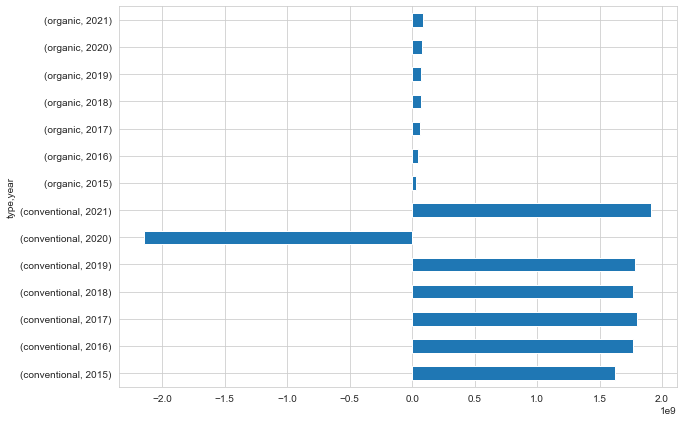

In [7]:
# What cities had the highest/lowest volume of organic avocado
df_us.groupby(['type', 'year'])['TotalVolume'].sum().astype(int).plot(kind='barh')

In [8]:
df_us.groupby(['type', 'year'])['TotalVolume'].sum().astype(int)

type          year
conventional  2015    1623685915
              2016    1770259388
              2017    1801769881
              2018    1770066373
              2019    1785499008
              2020   -2147483648
              2021    1912369295
organic       2015      33569305
              2016      48899753
              2017      62923682
              2018      73194855
              2019      70313341
              2020      81470558
              2021      87744168
Name: TotalVolume, dtype: int32

conventional    361
organic         361
Name: type, dtype: int64


C:\Users\mirei\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


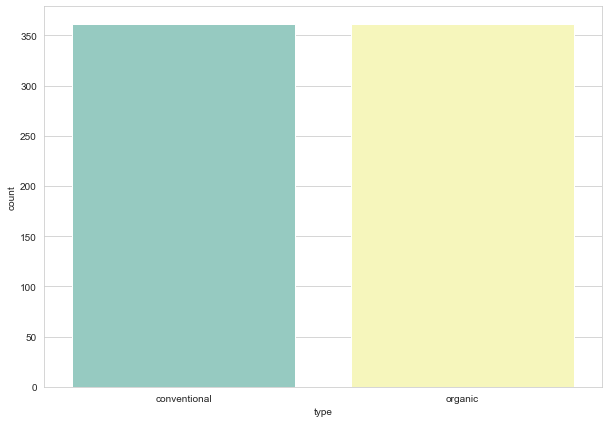

In [9]:
print(df_us['type'].value_counts())
sns.countplot('type', data=df_us, palette='Set3')

plt.show()

In [10]:
df1=df_us.copy().reset_index()

In [11]:
# Ingeneral, the price drop from 2019 to 2021 (due to covid 19)

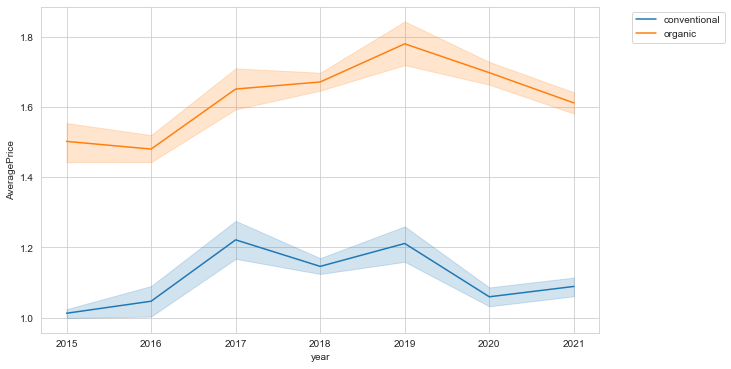

In [12]:
# yearly average prices by avocado type
fig, ax = plt.subplots(figsize=(10,6))
sns.lineplot(data=df1, x="year", y="AveragePrice", hue="type")
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

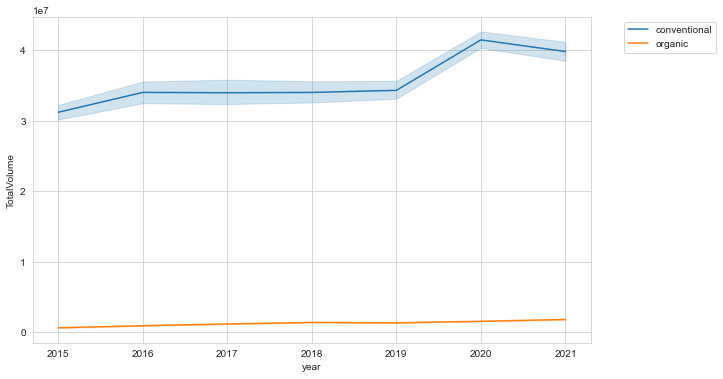

In [13]:
# yearly average prices by avocado type
fig, ax = plt.subplots(figsize=(10,6))
sns.lineplot(data=df1, x="year", y="TotalVolume", hue="type")
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

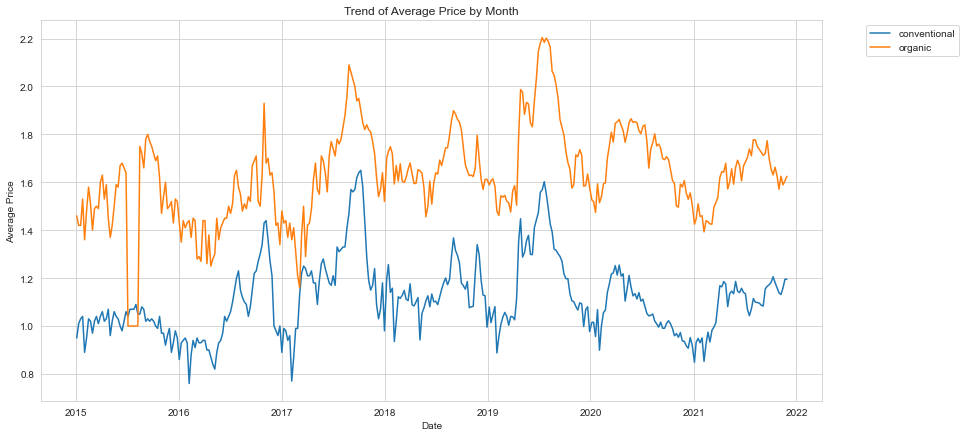

In [14]:
fig, ax = plt.subplots(figsize=(14,7))
ax.set_title('Trend of Average Price by Month')
ax.set_xlabel('Date')
ax.set_ylabel('Average Price')
sns.lineplot(data=df1, x="Date", y="AveragePrice", hue="type", ci=None)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left') 
plt.show()

Text(0.5, 1.0, 'Avocado prices')

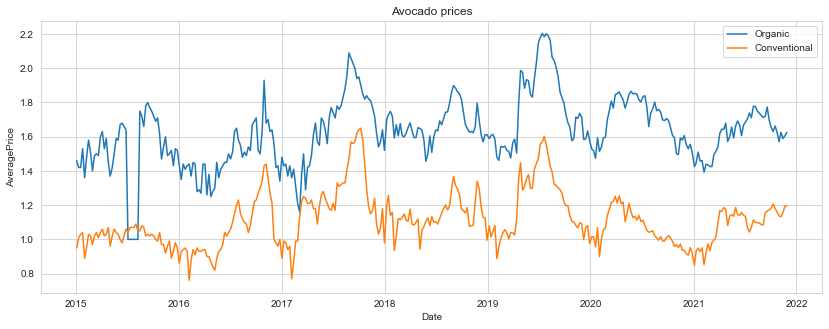

In [15]:
# plot Organic versus Conventional
plt.figure(figsize=(14,5))

sns.lineplot(data=df_us_org["AveragePrice"],label="Organic")
sns.lineplot(data=df_us_con["AveragePrice"],label="Conventional")

plt.xlabel("Date")
plt.title('Avocado prices')

Text(0.5, 1.0, 'Avocado TotalVolume')

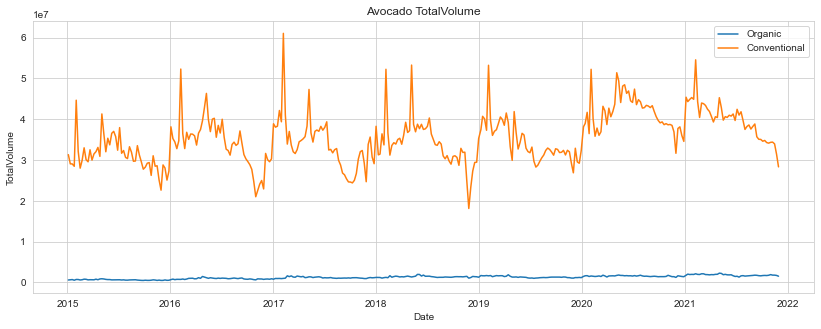

In [16]:
# plot Organic versus Conventional in Los Angeles
plt.figure(figsize=(14,5))

sns.lineplot(data=df_us_org["TotalVolume"],label="Organic")
sns.lineplot(data=df_us_con["TotalVolume"],label="Conventional")

plt.xlabel("Date")
plt.title('Avocado TotalVolume')

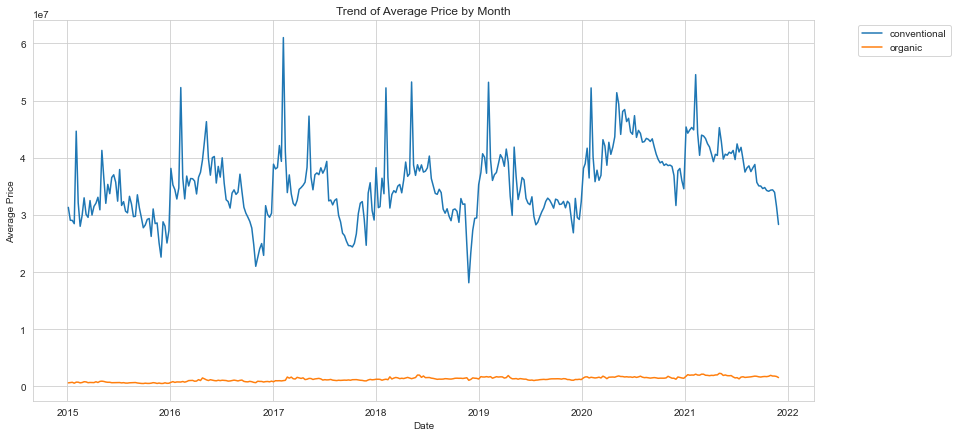

In [17]:
fig, ax = plt.subplots(figsize=(14,7))
ax.set_title('Trend of Average Price by Month')
ax.set_xlabel('Date')
ax.set_ylabel('Average Price')
sns.lineplot(data=df1, x="Date", y="TotalVolume", hue="type", ci=None)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left') 
plt.show()

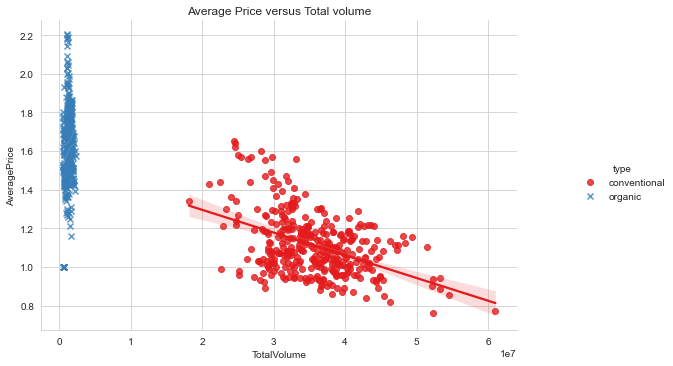

In [18]:
g= sns.lmplot(x="TotalVolume", y="AveragePrice", 
           data=df1, hue="type", markers=["o", "x"],palette="Set1")
g.fig.set_size_inches(10,5)
plt.title('Average Price versus Total volume')
plt.show()

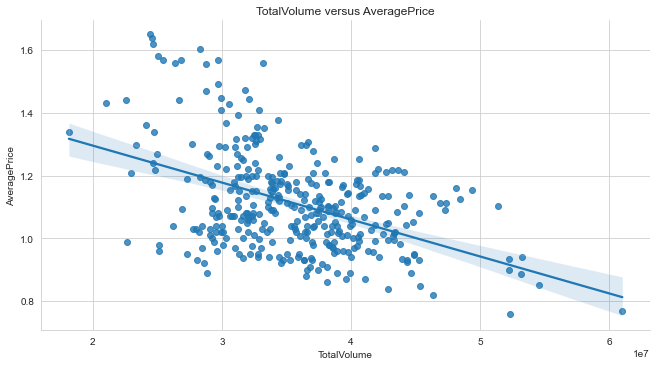

In [19]:
g= sns.lmplot(x='TotalVolume', y='AveragePrice', 
           data=df_us_con)
g.fig.set_size_inches(10,5)
plt.title('TotalVolume versus AveragePrice')
plt.show()

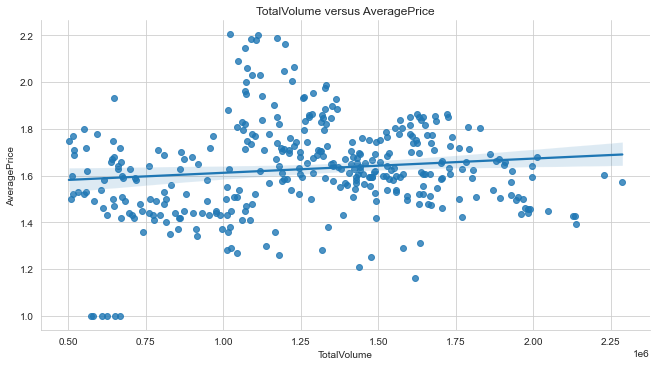

In [20]:
g= sns.lmplot(x='TotalVolume', y='AveragePrice', 
           data=df_us_org)
g.fig.set_size_inches(10,5)
plt.title('TotalVolume versus AveragePrice')
plt.show()

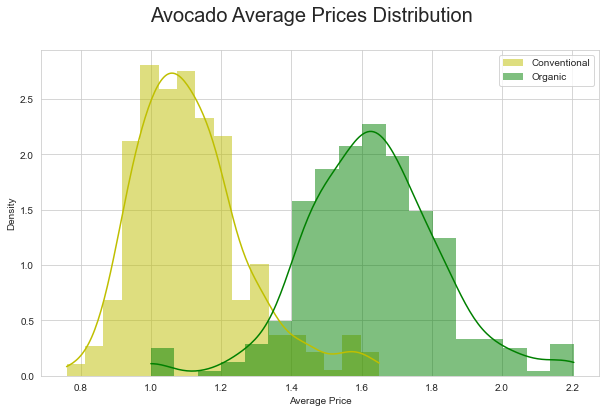

In [21]:
#sns.set_style("darkgrid")

fig, ax = plt.subplots(figsize=(10,6))
fig.suptitle('Avocado Average Prices Distribution', fontsize = 20)
ax1 = sns.histplot(df1[df1['type']=='conventional']["AveragePrice"],
                   color = 'y', label = 'Conventional', kde=True,
                   stat="density",linewidth=0)
ax2 = sns.histplot(df1[df1['type']=='organic']["AveragePrice"],
                   color = 'g', label = 'Organic', kde=True, stat="density",
                   linewidth=0)
ax.set_xlabel('Average Price')
plt.legend(title_fontsize = 12)
plt.show()

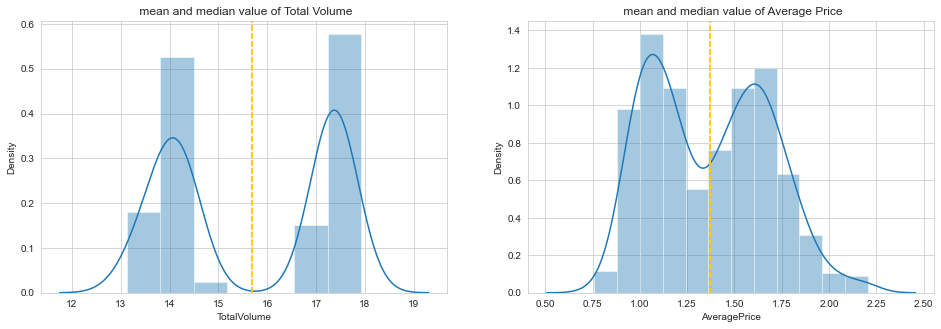

In [22]:
#  Plot the Distribution plots for the features
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(np.log(df1['TotalVolume']))
plt.axvline(np.log(df1['TotalVolume']).mean(), linestyle = '--', color = "red")
plt.axvline(np.log(df1['TotalVolume']).median(), linestyle = '--', color = "yellow")
plt.title(' mean and median value of Total Volume')
plt.subplot(1,2,2)
sns.distplot(df1['AveragePrice'])
plt.axvline(df1['AveragePrice'].mean(), linestyle = '--', color = "red")
plt.axvline(df1['AveragePrice'].median(), linestyle = '--', color = "yellow")
plt.title(' mean and median value of Average Price')
plt.show()

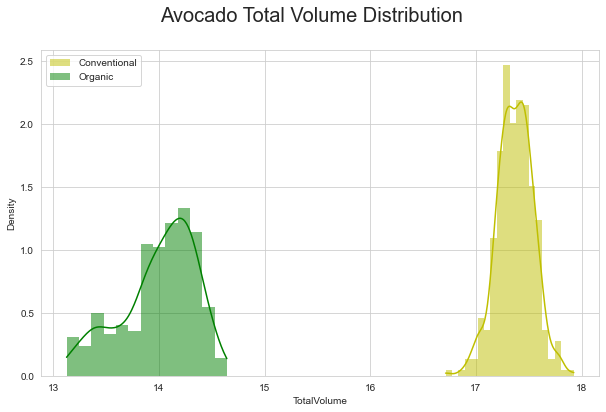

In [23]:

fig, ax = plt.subplots(figsize=(10,6))
fig.suptitle('Avocado Total Volume Distribution', fontsize = 20)
ax1 = sns.histplot(np.log(df1[df1['type']=='conventional']["TotalVolume"]),
                   color = 'y', label = 'Conventional', kde=True,
                   stat="density",linewidth=0)
ax2 = sns.histplot(np.log(df1[df1['type']=='organic']["TotalVolume"]),
                   color = 'g', label = 'Organic', kde=True, stat="density",
                   linewidth=0)
ax.set_xlabel("TotalVolume")
plt.legend(title_fontsize = 12)
plt.show()

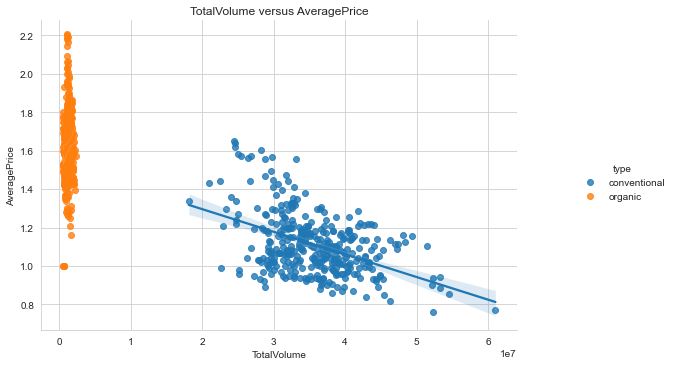

In [24]:
g= sns.lmplot(x='TotalVolume', y='AveragePrice', 
           data=df1, hue='type')
g.fig.set_size_inches(10,5)
plt.title('TotalVolume versus AveragePrice')
plt.show()

<AxesSubplot:>

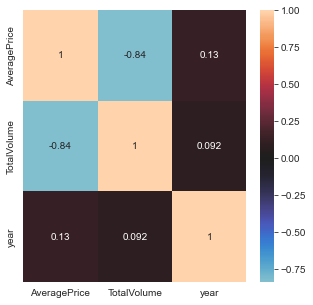

In [25]:
#  correlation matrix
plt.figure(figsize=(5,5))
sns.heatmap(df_us.corr(), center=0, annot=True)

<AxesSubplot:>

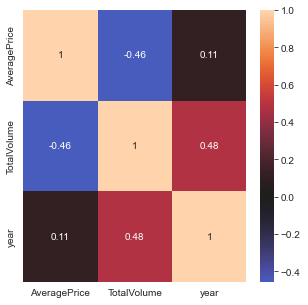

In [26]:
#  correlation matrix
plt.figure(figsize=(5,5))
sns.heatmap(df_us_con.corr(), center=0, annot=True)

<AxesSubplot:>

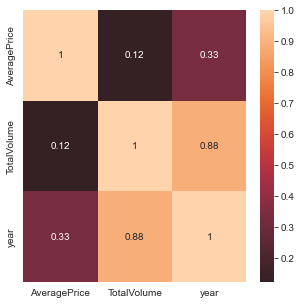

In [27]:
#  correlation matrix
plt.figure(figsize=(5,5))
sns.heatmap(df_us_org.corr(), center=0, annot=True)

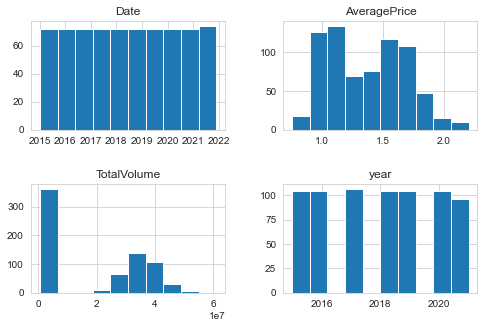

In [28]:
#view the distribution of data 
df1.hist(figsize=(8, 5) )
plt.subplots_adjust(hspace=0.5);

<AxesSubplot:xlabel='AveragePrice', ylabel='Density'>

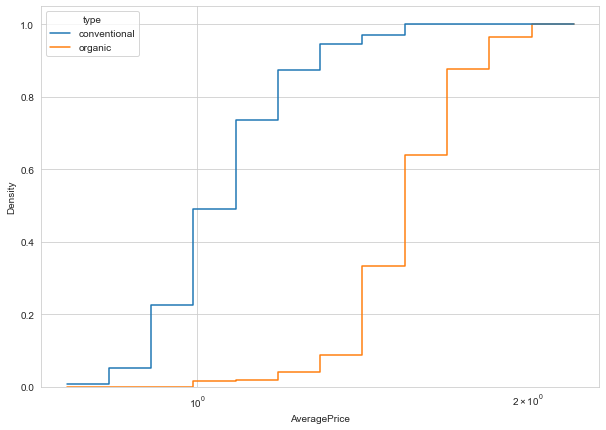

In [29]:
sns.histplot(
    data=df1, x="AveragePrice", hue="type",
    log_scale=True, element="step", fill=False,
    cumulative=True, stat="density", common_norm=False,
)

In [30]:
print(df_us_org.describe()), print(df_us_con.describe())

       AveragePrice   TotalVolume         year
count    361.000000  3.610000e+02   361.000000
mean       1.628271  1.269018e+06  2017.963989
std        0.197997  3.991624e+05     1.986434
min        1.000000  5.018149e+05  2015.000000
25%        1.504201  1.012237e+06  2016.000000
50%        1.624900  1.288272e+06  2018.000000
75%        1.743134  1.566617e+06  2020.000000
max        2.204078  2.287155e+06  2021.000000
       AveragePrice   TotalVolume         year
count    361.000000  3.610000e+02   361.000000
mean       1.112943  3.551650e+07  2017.963989
std        0.157797  6.109321e+06     1.986434
min        0.760000  1.813176e+07  2015.000000
25%        1.003172  3.134609e+07  2016.000000
50%        1.090000  3.508202e+07  2018.000000
75%        1.190000  3.920992e+07  2020.000000
max        1.650000  6.103446e+07  2021.000000


(None, None)

In [31]:
print(df_us.describe())

       AveragePrice   TotalVolume         year
count    722.000000  7.220000e+02   722.000000
mean       1.370607  1.839276e+07  2017.963989
std        0.313831  1.767328e+07     1.985056
min        0.760000  5.018149e+05  2015.000000
25%        1.083021  1.288431e+06  2016.000000
50%        1.370000  1.020946e+07  2018.000000
75%        1.627105  3.507764e+07  2020.000000
max        2.204078  6.103446e+07  2021.000000


# outliers  for all Regions -df

In [32]:
#https://www.kaggle.com/abdulmeral/avocado-all-in-one

Box plot
It captures the summary of the data effectively and efficiently with only a simple box and whiskers. Boxplot summarizes sample data using 25th, 50th, and 75th percentiles. One can just get insights(quartiles, median, and outliers) into the dataset by just looking at its boxplot.

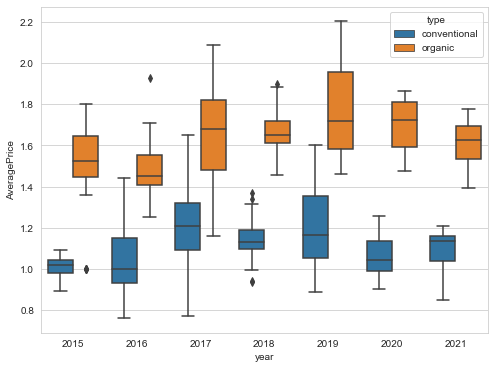

In [33]:
plt.subplots(figsize=(8,6))
sns.boxplot('year','AveragePrice', hue = 'type', data = df_us)
plt.show()

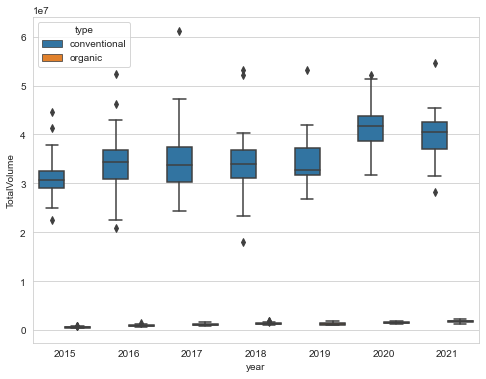

In [34]:
plt.subplots(figsize=(8,6))
sns.boxplot('year','TotalVolume', hue = 'type', data = df_us)
plt.show()

# visualizing_time_series

In [35]:
def visualizing_time_serie_tw(df):
    ax= df['AveragePrice'].resample('M').mean().plot(linewidth=2, fontsize=8,color='blue' );
    ax2 = ax.twinx()
    ax2=df['TotalVolume'].resample('M').mean().plot(linewidth=2, fontsize=8,color='red' );
    ax.set_ylabel('Average Price', fontsize=10)
    ax2.set_ylabel('Total Volume', fontsize=10)
    ax.set_title('Average Price and Total Volume - New York', fontsize=12)
    plt.legend()
    plt.show()
    return ax

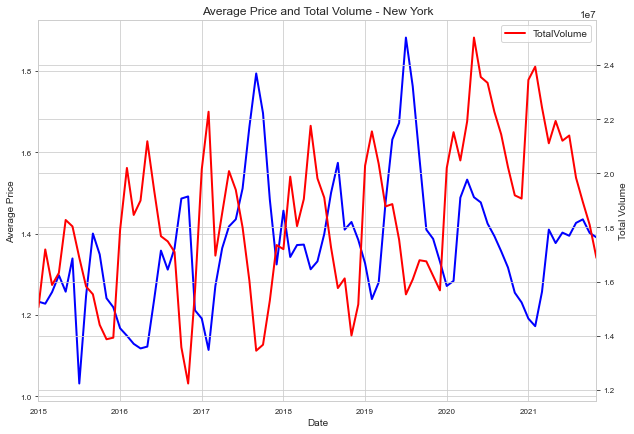

<AxesSubplot:title={'center':'Average Price and Total Volume - New York'}, xlabel='Date', ylabel='Average Price'>

In [36]:
visualizing_time_serie_tw(df_us)

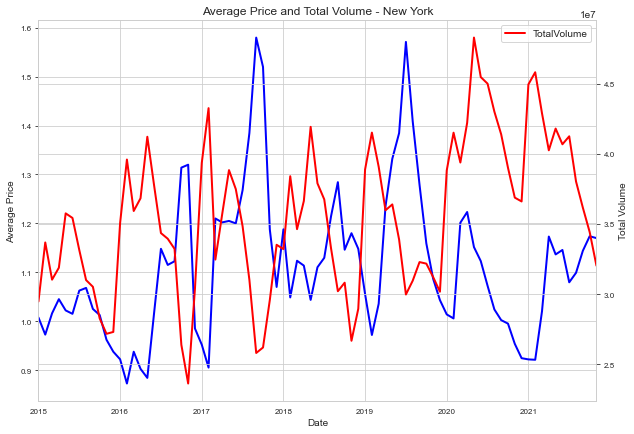

<AxesSubplot:title={'center':'Average Price and Total Volume - New York'}, xlabel='Date', ylabel='Average Price'>

In [37]:
visualizing_time_serie_tw(df_us_con)

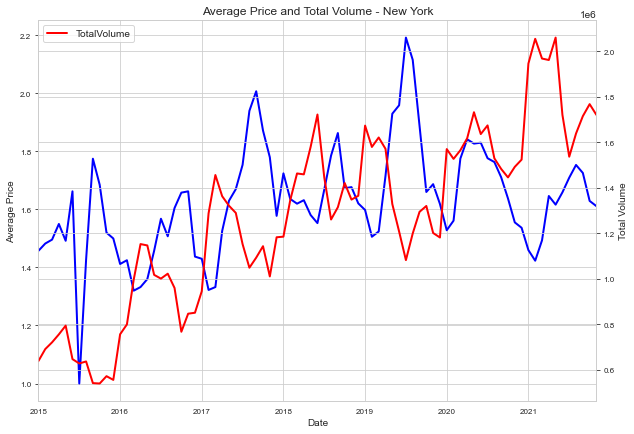

<AxesSubplot:title={'center':'Average Price and Total Volume - New York'}, xlabel='Date', ylabel='Average Price'>

In [38]:
visualizing_time_serie_tw(df_us_org)

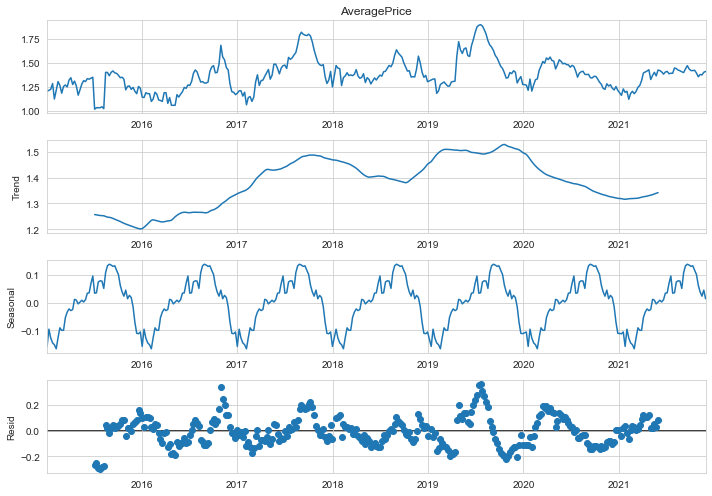

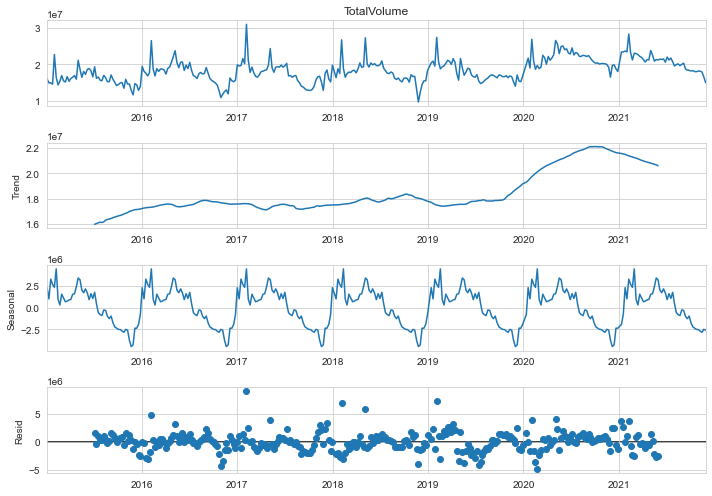

In [39]:
price = seasonal_decompose(df_us['AveragePrice'].resample('W').mean().dropna(),period = 52).plot()
vol = seasonal_decompose(df_us['TotalVolume'].resample('W').mean().dropna(),period = 52).plot()
plt.show()

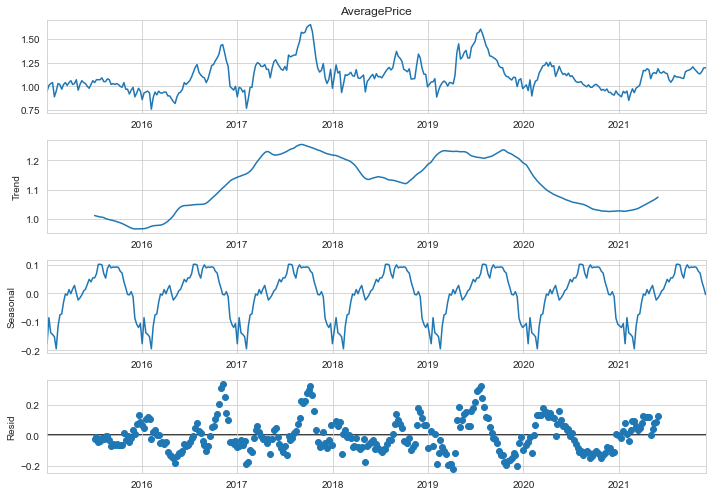

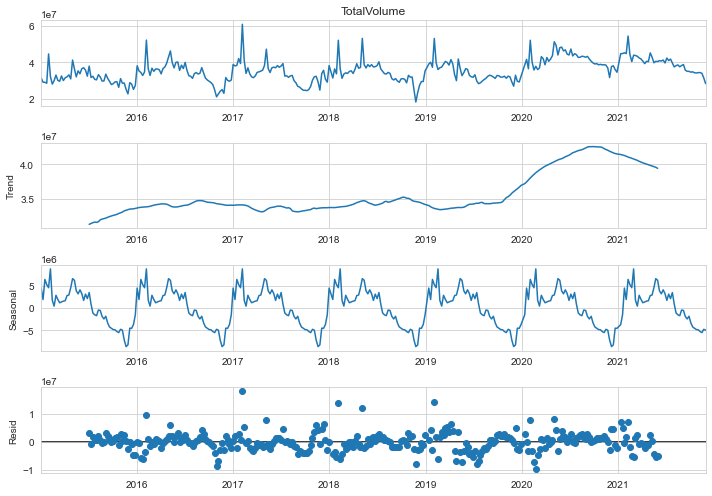

In [40]:
price = seasonal_decompose(df_us_con['AveragePrice'].resample('W').mean().dropna(),period = 52).plot()
vol = seasonal_decompose(df_us_con['TotalVolume'].resample('W').mean().dropna(),period = 52).plot()
plt.show()

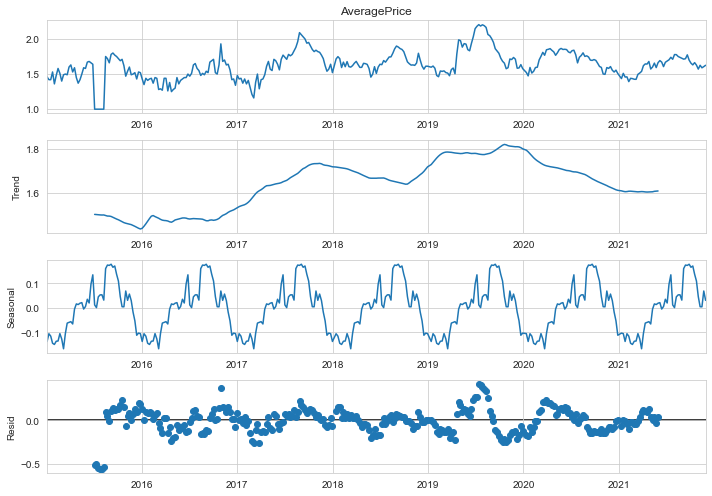

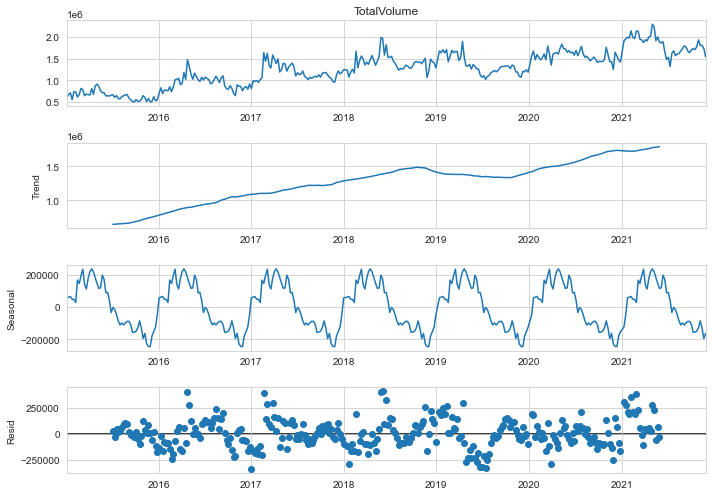

In [41]:
price = seasonal_decompose(df_us_org['AveragePrice'].resample('W').mean().dropna(),period = 52).plot()
vol = seasonal_decompose(df_us_org['TotalVolume'].resample('W').mean().dropna(),period = 52).plot()
plt.show()